# SPR 2022, Pre-conference Workshop
# Methods for Analyzing Neural Oscillations and Aperiodic Activity

## Lesson 1: Digital  Signal Processing and Simulations

In this notebook, we will go over some functions to simulate your own data using the NeuroDSP library
(https://neurodsp-tools.github.io/neurodsp/index.html)

### Set-up

#### Imports

In [1]:
# general 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Voytek Lab tools
from neurodsp import spectral
from neurodsp import filt
from neurodsp import sim
from neurodsp import utils

#### Settings

In [2]:
# signal params
N_SECONDS = 100 # signal duration
FS = 1000 # sampling frequnecy

In [3]:
# plotting params

# fontsize
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 10

# color
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['axes.facecolor'] = 'w'

#### Functions

In [4]:
def plot_signal_and_power(time, signal, freq, spectrum, title='', logscale=False, xlims=None):
    '''
    Plot time-series and corresponding power spectum

    Parameters
    ----------
    time : 1D array, float
        time-vector for signal
    signal : 1D array, float
        time-series e.g. LFP or EEG
    freq : 1D array, float
        frequency-vector for spectrum
    spectrum : 1D array, float
        power spectrum of signal
    title : str, optional
        figure title. The default is ''.
    logscale : bool, optional
        whether to plot the spectrum in log-log space. The default is False.
    xlims : 1D array (len=2), optional
        x-axis limits for time-series plot ([lower_limit, upper_limit]). 
        The default is None.

    '''
    # create figure
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=[12,4], gridspec_kw={'width_ratios': [3, 1]}, constrained_layout=True)
    fig.suptitle(title)

    # plot signal
    ax1.set(xlabel='time (s)', ylabel='voltage (au)', title='Time-series')
    ax1.plot(time, signal)
    if xlims:
        ax1.set_xlim(xlims)
        
    # plot spectra
    ax2.set(xlabel='frequency (Hz)', ylabel='power (au)', title='Power Spectral Density')
    ax2.plot(freq, spectrum);
    ax2.set_xlim([.1,200])
    if logscale:
        ax2.set(xscale='log', yscale='log')

    

### White Noise Signal - equal power over all frequencies

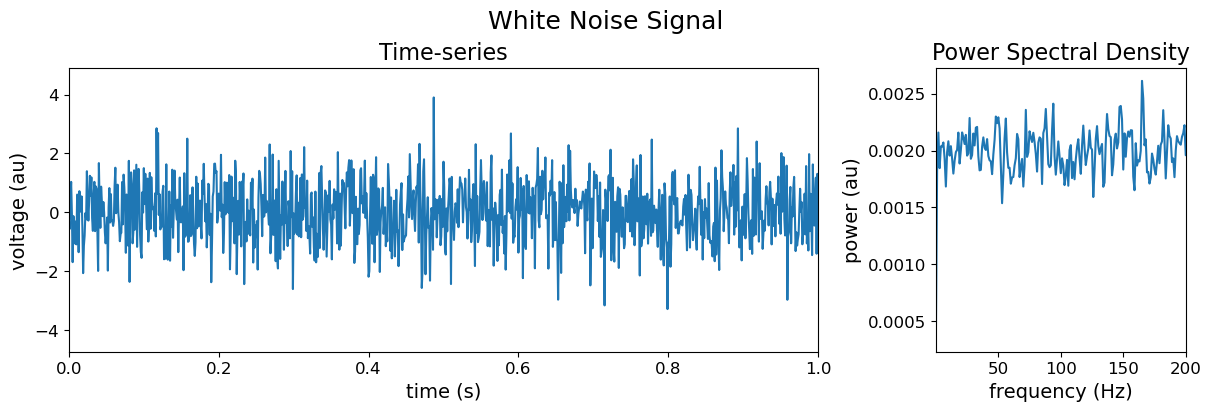

In [5]:
# simulate white noise signal
signal_white = np.random.normal(loc=0, scale=1, size=utils.data.compute_nsamples(N_SECONDS, FS))
time = utils.create_times(N_SECONDS, FS)

# compute power spectrum of white noise signal
freq, psd_white = spectral.compute_spectrum(signal_white, FS)

# plot
plot_signal_and_power(time, signal_white, freq, psd_white, title='White Noise Signal', xlims=[0,1])


### Sinusoidal Oscillations

#### simulate a sinusoidal oscillation

In [6]:
# settings
freq_oscillation = 10 # oscillation peak frequency

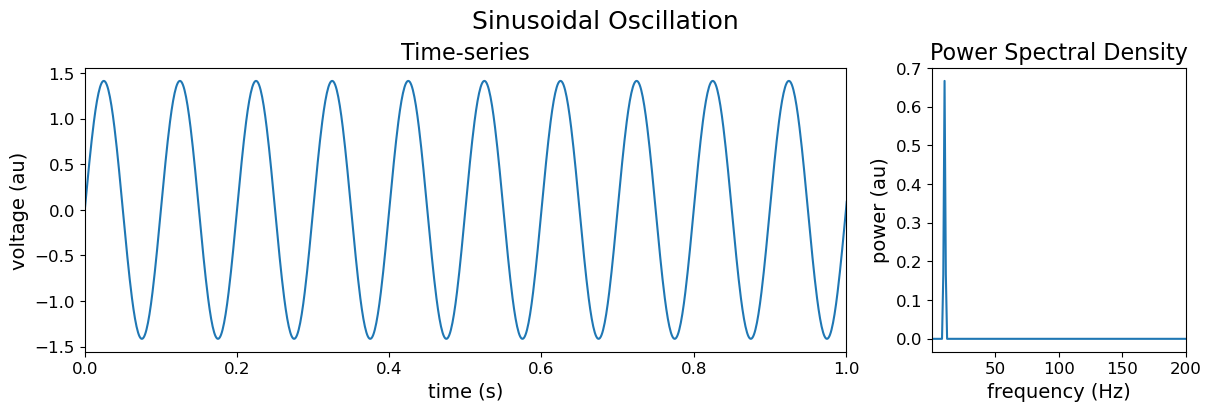

In [7]:
# simulate a sinusoidal oscillation
signal_sin = sim.sim_oscillation(N_SECONDS, FS, freq_oscillation)

# compute power spectrum of 10 Hz signal
_, psd_sin = spectral.compute_spectrum(signal_sin, FS)

# plot
plot_signal_and_power(time, signal_sin, freq, psd_sin, title='Sinusoidal Oscillation', xlims=[0,1])


#### simulate a signal containing *several* sinusoidal oscillations

In [8]:
# settings
freq_oscillations = [10, 35, 60] # oscillation peak frequency

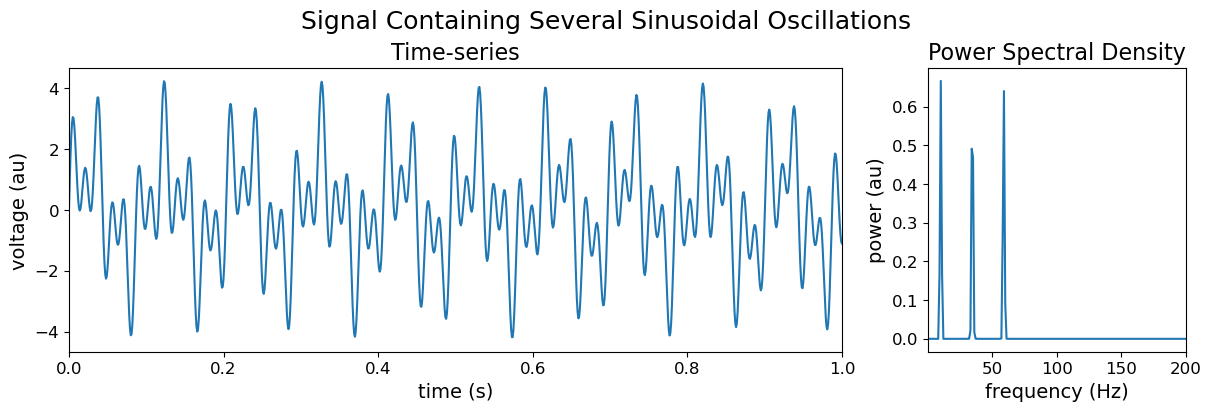

In [9]:
# simulate a sinusoidal oscillation
signal_sins = np.zeros_like(time)
for i_osc in range(len(freq_oscillations)):
    signal_sins += sim.sim_oscillation(N_SECONDS, FS, freq_oscillations[i_osc])

# compute power spectrum of several oscillations
_, psd_sins = spectral.compute_spectrum(signal_sins, FS)

# plot
plot_signal_and_power(time, signal_sins, freq, psd_sins, 
    title='Signal Containing Several Sinusoidal Oscillations', xlims=[0,1])


#### simulate a signal containing *many* sinusoidal oscillations

In [10]:
# settings
osc_freq = np.random.rand(10)*100 # oscillation peak frequency
osc_amp = np.random.rand(10)*100 # oscillation amplitude

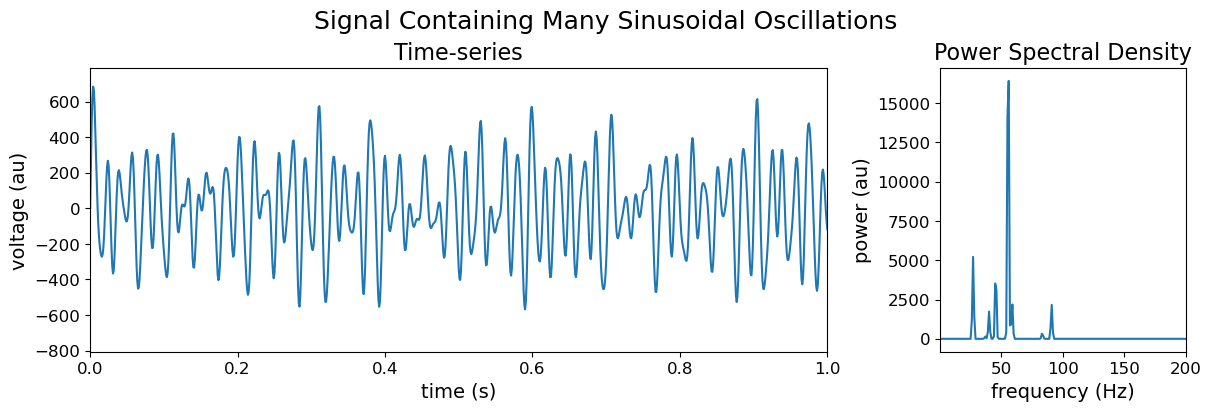

In [11]:
# simulate a sinusoidal oscillation
signal_sins2 = np.zeros_like(time)
for i_osc in range(len(osc_freq)):
    signal_sins2 += sim.sim_oscillation(N_SECONDS, FS, osc_freq[i_osc]) * osc_amp[i_osc]

# compute power spectrum of white noise signal
_, psd_sins2 = spectral.compute_spectrum(signal_sins2, FS)

# plot
plot_signal_and_power(time, signal_sins2, freq, psd_sins2, 
    title='Signal Containing Many Sinusoidal Oscillations', xlims=[0,1])


### Non-stationary Oscillations (Bursts)

In [12]:
# settings
freq_oscillation = 10 # oscillation peak frequency
cycle = 'sine' # oscillation waveform shape

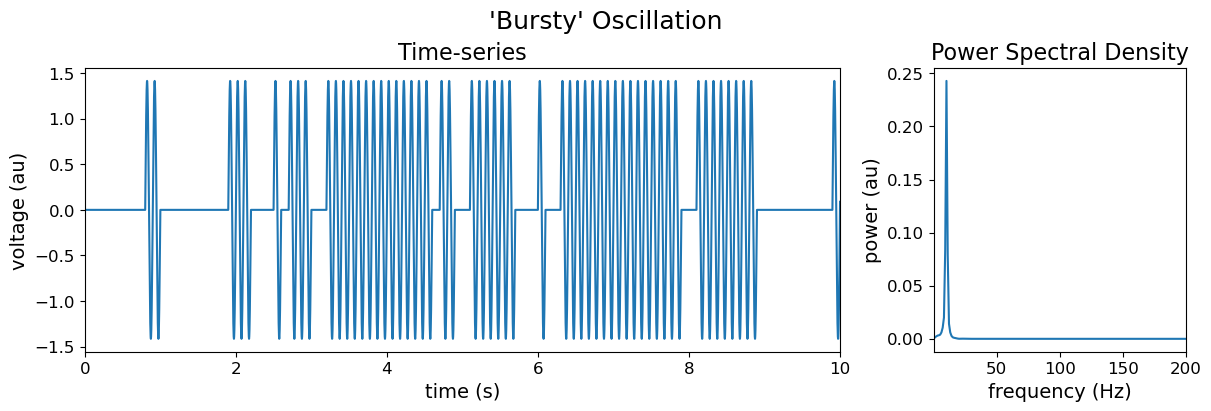

In [13]:
# simulate a sinusoidal oscillation
signal_bursty =  sim.sim_bursty_oscillation(n_seconds=N_SECONDS, fs=FS, freq=freq_oscillation, cycle=cycle)

# compute power spectrum of white noise signal
_, psd_bursty = spectral.compute_spectrum(signal_bursty, FS)

# plot
plot_signal_and_power(time, signal_bursty, freq, psd_bursty, title="'Bursty' Oscillation", xlims=[0,10])

### Non-sinusoidal Oscillations

In [14]:
# settings
freq_oscillation = 10 # oscillation peak frequency
cycle = 'sawtooth' # oscillation waveform shape
width = 1 # sawtooth waveform parameter (0: fast rise. 0.5: symmetric. 1: fast decay)

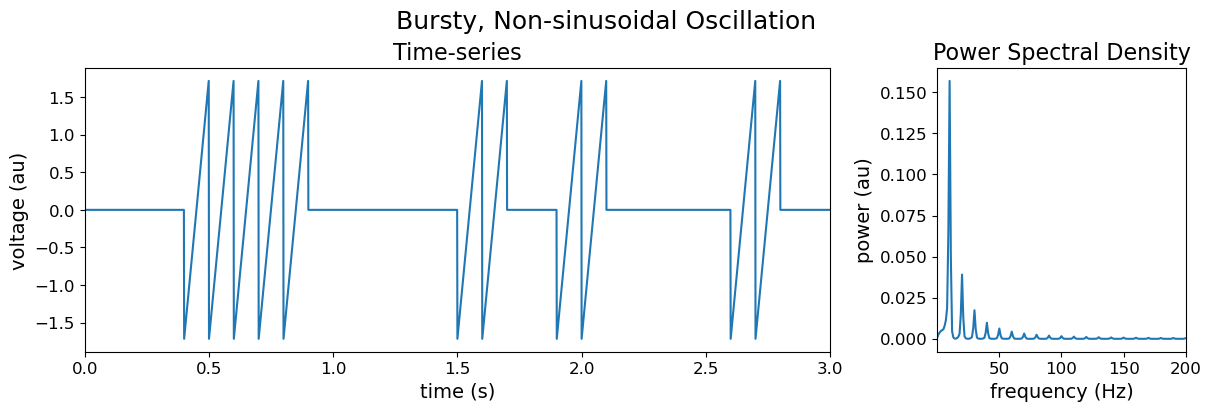

In [15]:
# simulate a sinusoidal oscillation
signal_saw =  sim.sim_bursty_oscillation(n_seconds=N_SECONDS, fs=FS, freq=freq_oscillation, cycle=cycle, width=width)

# compute power spectrum of white noise signal
_, psd_saw = spectral.compute_spectrum(signal_saw, FS)

# plot
plot_signal_and_power(time, signal_saw, freq, psd_saw,
    title='Bursty, Non-sinusoidal Oscillation', xlims=[0,3])

### Oscillation Embedded in Aperiodic Activity 

In [16]:
# settings
sim_components = {'sim_oscillation': {'freq' : 10},
                  'sim_powerlaw': {'exponent' : -2}} # aperiodic exponent (spectral slope)

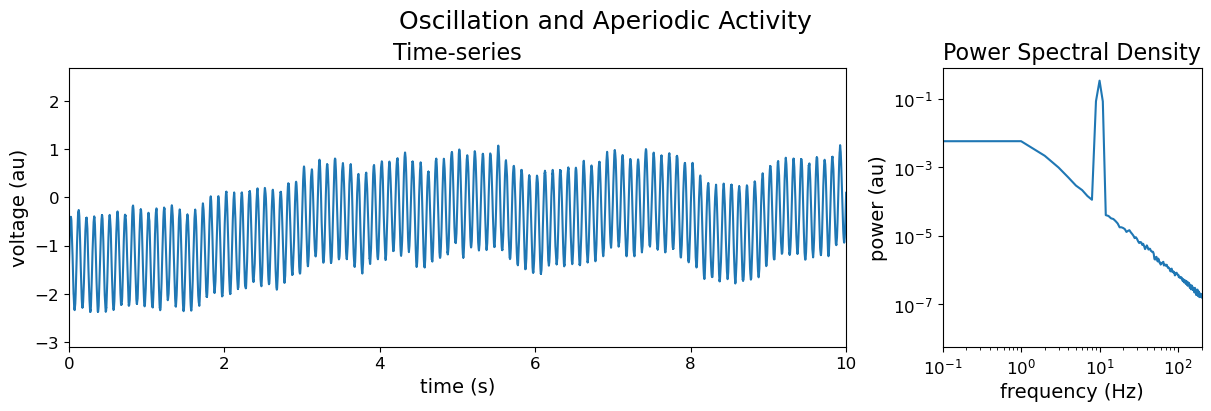

In [17]:
# simulate a sinusoidal oscillation
signal_comb =  sim.sim_combined(n_seconds=N_SECONDS, fs=FS, components=sim_components)

# compute power spectrum of white noise signal
_, psd_comb = spectral.compute_spectrum(signal_comb, FS)

# plot
plot_signal_and_power(time, signal_comb, freq, psd_comb,
    title='Oscillation and Aperiodic Activity',
    logscale=True, xlims=[0,10])
